Importamos librerias a utilizar

In [1]:
import pymongo
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate
from scipy import stats

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Conexion al cliente de mongoDB

In [2]:
client = pymongo.MongoClient('mongodb://localhost:27017/', serverSelectionTimeoutMS=5000)

try:   
    print(client.start_session)
    
except Exception:
    print("Unable to connect to the server.")

<bound method MongoClient.start_session of MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=5000)>


## Obtener información del servidor

In [3]:
server_info = client.server_info()
print(server_info)

{'version': '5.0.5', 'gitVersion': 'd65fd89df3fc039b5c55933c0f71d647a54510ae', 'targetMinOS': 'Windows 7/Windows Server 2008 R2', 'modules': [], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [5, 0, 5, 0], 'openssl': {'running': 'Windows SChannel'}, 'buildEnvironment': {'distmod': 'windows', 'distarch': 'x86_64', 'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.26.28806 for x64', 'ccflags': '/nologo /WX /FImongo/platform/basic.h /EHsc /W3 /wd4068 /wd4244 /wd4267 /wd4290 /wd4351 /wd4355 /wd4373 /wd4800 /wd4251 /wd4291 /we4013 /we4099 /we4930 /errorReport:none /MD /O2 /Oy- /bigobj /utf-8 /permissive- /Zc:__cplusplus /Zc:sizedDealloc /volatile:iso /diagnostics:caret /std:c++17 /Gw /Gy /Zc:inline', 'cxx': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.26.28806 for x64', 'cxxflags': '/TP', 'linkflags': '/nologo /DEBUG /INCREMENTAL:NO /LARGEADDRESSAWARE /OPT:REF', 'target_arch': 'x86_64', 'target_os': 'windows', 'cppdefine

## Verificación bases de datos y colecciones

In [4]:
database_names = client.list_database_names()
for db_name in database_names:
    print(db_name)

Schools
admin
airbnb
config
local
miscelanea
siedco


In [5]:
dbSiedco = client.siedco
for coll_name in dbSiedco.list_collection_names():
    print(coll_name)

delitos
DelitosPrepro


#  Carga de documentos delitos en dataframe

In [6]:
dfDelitos = pd.DataFrame(list(dbSiedco.delitos.find()))

In [7]:
dfDelitos.tail()

,_id,Fecha,Anio,Nro_Mes,Mes,Nombre_Dia,Rango_Dia,Localidad,UPZ,Sexo,Delito,Modalidad,Arma_Empleada,Numero_Hechos
1370836,64362094a0eb44e4efad97b3,2019-12-31,2019,12,DIC,MARTES,NOCHE,05 - USME,ALFONSO LOPEZ,MASCULINO,VIOLENCIA INTRAFAMILIAR,RIÑAS,ARMA BLANCA / CORTOPUNZANTE,1
1370837,64362094a0eb44e4efad97b4,2019-12-31,2019,12,DIC,MARTES,NOCHE,11 - SUBA,SUBA,MASCULINO,HOMICIDIOS,RIÑAS,ARMA BLANCA / CORTOPUNZANTE,1
1370838,64362094a0eb44e4efad97b5,2019-12-31,2019,12,DIC,MARTES,NOCHE,08 - KENNEDY,TIMIZA,FEMENINO,VIOLENCIA INTRAFAMILIAR,-,NO REPORTADO,1
1370839,64362094a0eb44e4efad97b6,2019-12-31,2019,12,DIC,MARTES,NOCHE,01 - USAQUÉN,SAN CRISTOBAL NORTE,MASCULINO,HURTO A PERSONAS,ATRACO,SIN EMPLEO DE ARMAS,1
1370840,64362094a0eb44e4efad97b7,2019-12-31,2019,12,DIC,MARTES,NOCHE,07 - BOSA,BOSA CENTRAL,FEMENINO,AMENAZAS,-,NO REPORTADO,1


In [8]:
dfDelitos.shape

(1370841, 14)

# Análisis exploratorio de datos (EDA)

Obtener información básica sobre el conjunto de datos:

In [9]:
dfDelitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370841 entries, 0 to 1370840
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   _id            1370841 non-null  object
 1   Fecha          1370841 non-null  object
 2   Anio           1370841 non-null  object
 3   Nro_Mes        1370841 non-null  object
 4   Mes            1370841 non-null  object
 5   Nombre_Dia     1370841 non-null  object
 6   Rango_Dia      1370841 non-null  object
 7   Localidad      1370841 non-null  object
 8   UPZ            1370841 non-null  object
 9   Sexo           1370841 non-null  object
 10  Delito         1370841 non-null  object
 11  Modalidad      1370841 non-null  object
 12  Arma_Empleada  1370841 non-null  object
 13  Numero_Hechos  1370841 non-null  object
dtypes: object(14)
memory usage: 146.4+ MB


In [10]:
dfDelitos.columns.values

array(['_id', 'Fecha', 'Anio', 'Nro_Mes', 'Mes', 'Nombre_Dia',
       'Rango_Dia', 'Localidad', 'UPZ', 'Sexo', 'Delito', 'Modalidad',
       'Arma_Empleada', 'Numero_Hechos'], dtype=object)

In [11]:
dfDelitos.dtypes

_id              object
Fecha            object
Anio             object
Nro_Mes          object
Mes              object
Nombre_Dia       object
Rango_Dia        object
Localidad        object
UPZ              object
Sexo             object
Delito           object
Modalidad        object
Arma_Empleada    object
Numero_Hechos    object
dtype: object

## Se analiza cada columna del dataframe

In [12]:
print('Fecha max: ', dfDelitos['Fecha'].max())
print('Fecha min: ', dfDelitos['Fecha'].min())

Fecha max:  2023-02-28
Fecha min:  2019-01-01


In [13]:
print('Año valores: ', dfDelitos['Anio'].unique())

Año valores:  ['2023' '2022' '2021' '2020' '2019']


In [14]:
print('Nro del Mes valores: ', dfDelitos['Nro_Mes'].unique())

Nro del Mes valores:  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [15]:
print('Mes: ', dfDelitos['Mes'].unique())

Mes:  ['ENE' 'FEB' 'MAR' 'ABR' 'MAY' 'JUN' 'JUL' 'AGO' 'SEP' 'OCT' 'NOV' 'DIC']


In [16]:
print('Nombre_Dia: ', dfDelitos['Nombre_Dia'].unique())

Nombre_Dia:  ['DOMINGO' 'LUNES' 'MARTES' 'MIÉRCOLES' 'JUEVES' 'VIERNES' 'SÁBADO']


In [17]:
print('Rango_Dia: ', dfDelitos['Rango_Dia'].unique())

Rango_Dia:  ['MADRUGADA' 'MAÑANA' 'TARDE' 'NOCHE']


In [18]:
print('Localidad:')
print(dfDelitos['Localidad'].unique())

Localidad:
['01 - USAQUÉN' '02 - CHAPINERO' '03 - SANTA FE' '04 - SAN CRISTÓBAL'
 '05 - USME' '06 - TUNJUELITO' '07 - BOSA' '08 - KENNEDY' '09 - FONTIBÓN'
 '10 - ENGATIVÁ' '11 - SUBA' '12 - BARRIOS UNIDOS' '15 - ANTONIO NARIÑO'
 '16 - PUENTE ARANDA' '18 - RAFAEL URIBE URIBE' '19 - CIUDAD BOLÍVAR'
 '14 - LOS MÁRTIRES' '13 - TEUSAQUILLO' '17 - CANDELARIA' '20 - SUMAPAZ'
 '99 - SIN LOCALIZACION']


In [19]:
print('UPZ:')
print(dfDelitos['UPZ'].unique())

UPZ:
['TOBERIN' 'VERBENAL' 'PARDO RUBIO' 'LAS CRUCES' 'LOURDES'
 'LOS LIBERTADORES' 'GRAN YOMASA' 'VENECIA' 'APOGEO' 'BOSA CENTRAL'
 'BOSA OCCIDENTAL' 'TINTAL SUR' 'AMERICAS' 'GRAN BRITALIA' 'CAPELLANIA'
 'BOYACA REAL' 'MINUTO DE DIOS' 'EL PRADO' 'EL RINCON' 'LA ALHAMBRA'
 'SUBA' 'TIBABUYES' 'DOCE DE OCTUBRE' 'LOS ALCAZARES' 'RESTREPO'
 'CIUDAD MONTES' 'PUENTE ARANDA' 'DIANA TURBAY' 'ISMAEL PERDOMO' 'LUCERO'
 'SAN FRANCISCO' 'PATIO BONITO' 'ENGATIVA' 'EL TESORO'
 'SIN UPZ SAN CRISTOBAL' 'EL REFUGIO' 'CALANDAIMA' 'FONTIBON'
 'SANTA BARBARA' 'CORABASTOS' 'TIMIZA' 'LAS FERIAS' 'MARCO FIDEL SUAREZ'
 'JERUSALEM' 'LOS CEDROS' 'PASEO DE LOS LIBERTADORES' 'COMUNEROS'
 'CIUDAD SALITRE OCCIDENTAL' 'GARCES NAVAS' 'CASTILLA' 'ALFONSO LOPEZ'
 'SAN BLAS' 'DANUBIO' 'ALAMOS' 'MUZU' 'LA SABANA' 'CARVAJAL'
 'SAGRADO CORAZON' 'UPR RIO TUNJUELO' 'EL PORVENIR' 'LA GLORIA' 'SOSIEGO'
 'BAVARIA' 'LOS ANDES' 'SAN CRISTOBAL NORTE' 'LAS NIEVES'
 'FONTIBON SAN PABLO' 'MARRUECOS' 'ZONA FRANCA' 'LA FLORESTA'
 'CIUD

In [20]:
print('Sexo:')
print(dfDelitos['Sexo'].unique())

Sexo:
['FEMENINO' 'MASCULINO' '-']


In [21]:
print('Delito:')
print(dfDelitos['Delito'].unique())

Delito:
['VIOLENCIA INTRAFAMILIAR' 'LESIONES PERSONALES' 'HURTO A RESIDENCIAS'
 'HURTO A PERSONAS' 'DELITOS SEXUALES' 'AMENAZAS' 'HURTO A COMERCIO'
 'LESIONES EN ACCIDENTES DE TRANSITO' 'HURTO DE CELULARES'
 'HURTO DE CELULARES (CASOS)' 'HURTO DE BICICLETAS' 'HOMICIDIOS'
 'HURTO MOTOCICLETAS' 'HOMICIDIOS EN ACCIDENTES DE TRANSITO'
 'HURTO AUTOMOTORES' 'EXTORSION' 'SECUESTRO' 'HURTO ABIGEATO'
 'HURTO A ENTIDADES FINANCIERAS' 'TERRORISMO' 'HURTO PIRATERIA TERRESTRE']


In [22]:
print('Modalidad:')
print(dfDelitos['Modalidad'].unique())

Modalidad:
['RIÑAS' 'FACTOR DE OPORTUNIDAD' 'NO REPORTADA' 'RIÑA HIJO-MADRE'
 'AMENAZA/CHANTAJE' 'EMPLEO DE SUSTANCIAS TOXICAS' 'VANDALISMO' 'ATRACO'
 'LLAVE MAESTRA' 'ACCIDENTE TRANSITO BICICLETA'
 'RIÑA ENTRE COMPAÑEROS PERMANENTES' 'COSQUILLEO' 'VENTOSA'
 'ACCIDENTE TRANSITO VEHICULO' 'ACCIDENTE TRANSITO MOTO' 'ENGAÑO'
 'DIRECTA' 'VIOLENCIA INTRAFAMILIAR' 'REDES SOCIALES'
 'VIOLACION DE CERRADURA' 'SICARIATO' 'HALADO' 'RAPONAZO'
 'ACCIDENTE TRANSITO PEATON' 'MENSAJE DE TEXTO' 'POR AMIGO / CONOCIDO'
 'CLASICA' 'ROMPIMIENTO DE VIDRIO' 'FORCEJEO' 'DESCUELGUE DE MERCANCIA'
 'USO SUSTANCIAS TOXICAS / ESCOPOLAMINADO' 'MECHERO/HORMIGUEO'
 'SIGNOS DE VIOLENCIA FÍSICA (TORTURA)' 'CARCELARIA' 'ACCIDENTAL'
 'RIÑA ENTRE ESPOSOS' 'RIÑA O CONFLICTO ENTRE PANDILLAS' 'CAIDA' 'SEXTING'
 'PANFLETOS' 'CIBER EXTORSION' 'TIO / TIA' 'SUPLANTACIÓN'
 'PUBLICACION IMAG./VIDEOS PORNO.INFANTIL' 'VIOLACION CAJA FUERTE'
 'INTIMA' 'VANDALISMO/SAQUEO' 'PAQUETE CHILENO' 'EXTORSION GAO'
 'RIÑA ENTRE HERMANOS' 'CON 

In [23]:
print('Arma_Empleada:')
print(dfDelitos['Arma_Empleada'].unique())

Arma_Empleada:
['SIN EMPLEO DE ARMAS' 'CONTUNDENTES' 'ARMA BLANCA / CORTOPUNZANTE'
 'BICICLETA' 'MOTO' 'ARMA DE FUEGO' 'PALANCAS' 'LLAVE MAESTRA' 'VEHICULO'
 'LLAMADA TELEFONICA' 'DIRECTA' 'ESCOPOLAMINA' 'REDES SOCIALES'
 'NO REPORTADO' 'POR ESTABLECER' 'ARMA TRAUMATICA' 'CARTA EXTORSIVA'
 'MIXTA' 'PERRO' 'COMBUSTIBLE' 'POLVORA (FUEGOS PIROTECNICOS)' 'GASES'
 'MEDIOS DE COMUNICACIÓN Y REDES SOCIALES AFTER SCHOOL' 'CARRO BOMBA'
 'TREN' 'ARTEFACTO EXPLOSIVO / CARGA DINAMITA' 'ALUCINOGENOS'
 'CINTAS / CINTURON' 'MINA ANTIPERSONA' 'AGUACALIENTE' 'MEDICAMENTOS'
 'SUSTANCIASTOXICAS' 'QUIMICOS' 'JERINGA' 'ALIMENTOS VENCIDOS' '-' 'ACIDO'
 'BOLSA PLASTICA' 'PRENDAS DE VESTIR' 'PAQUETE BOMBA' 'CUERDA/SOGA/CADENA']


In [24]:
print('Numero_Hechos max: ', dfDelitos['Numero_Hechos'].max())
print('Numero_Hechos min: ', dfDelitos['Numero_Hechos'].min())

Numero_Hechos max:  9
Numero_Hechos min:  0


# Identificación de columnas relevantes y eliminación

Se crea una copia del datafarame original antes de modificarlo

In [25]:
dfDelitosNew = dfDelitos.copy()

Eliminan las columnas ('_id','Anio', 'Nro_Mes', 'Mes', 'Nombre_Dia', 'Numero_Hechos')

In [26]:
# Eliminar columnas
dfDelitosNew.drop(['_id','Anio', 'Nro_Mes', 'Mes', 'Nombre_Dia', 'Numero_Hechos'], axis=1, inplace=True)

Nuevo conjunto de datos

In [27]:
dfDelitosNew = dfDelitosNew.groupby(['Fecha', 'Rango_Dia', 'Localidad', 'UPZ', 'Sexo', 'Delito', 'Modalidad', 'Arma_Empleada']).size().reset_index(name='Numero_Hechos')
# Convertir la columna de fecha a datetime
dfDelitosNew['Fecha'] = pd.to_datetime(dfDelitosNew['Fecha'])

# Desagregar la columna de fecha en año, mes y día
dfDelitosNew['Anio'] = dfDelitosNew['Fecha'].dt.year
dfDelitosNew['Mes'] = dfDelitosNew['Fecha'].dt.month
dfDelitosNew['Dia'] = dfDelitosNew['Fecha'].dt.day

# Reordenan
dfDelitosNew = dfDelitosNew[["Anio","Mes","Dia","Fecha","Rango_Dia","Localidad","UPZ","Sexo","Delito","Modalidad","Arma_Empleada","Numero_Hechos"]]
dfDelitosNew.head()



,Anio,Mes,Dia,Fecha,Rango_Dia,Localidad,UPZ,Sexo,Delito,Modalidad,Arma_Empleada,Numero_Hechos
0,2019,1,1,2019-01-01,MADRUGADA,01 - USAQUÉN,LOS CEDROS,MASCULINO,HURTO A PERSONAS,FACTOR DE OPORTUNIDAD,SIN EMPLEO DE ARMAS,1
1,2019,1,1,2019-01-01,MADRUGADA,01 - USAQUÉN,SAN CRISTOBAL NORTE,FEMENINO,VIOLENCIA INTRAFAMILIAR,-,NO REPORTADO,1
2,2019,1,1,2019-01-01,MADRUGADA,01 - USAQUÉN,SAN CRISTOBAL NORTE,MASCULINO,VIOLENCIA INTRAFAMILIAR,-,NO REPORTADO,1
3,2019,1,1,2019-01-01,MADRUGADA,01 - USAQUÉN,SANTA BARBARA,FEMENINO,HURTO A RESIDENCIAS,VIOLACION DE CERRADURA,SIN EMPLEO DE ARMAS,1
4,2019,1,1,2019-01-01,MADRUGADA,01 - USAQUÉN,TOBERIN,FEMENINO,VIOLENCIA INTRAFAMILIAR,-,NO REPORTADO,1


# Identificación de los datos faltantes

In [28]:
# Identificación de los datos faltantes
print("Datos faltantes por columna:")
print(dfDelitosNew.isnull().sum())

Datos faltantes por columna:
Anio             0
Mes              0
Dia              0
Fecha            0
Rango_Dia        0
Localidad        0
UPZ              0
Sexo             0
Delito           0
Modalidad        0
Arma_Empleada    0
Numero_Hechos    0
dtype: int64


# Conversiones de tipos de datos

Definición tipos de datos Antes - Despues

In [29]:
# Imprimimos los tipos de datos de los atributos
print('Antes')
print(dfDelitosNew.dtypes)

# Cambiamos los tipos de datos de los atributos
dfDelitosNew['Anio'] = dfDelitosNew['Anio'].astype(int)
dfDelitosNew['Mes'] = dfDelitosNew['Mes'].astype(int)
dfDelitosNew['Dia'] = dfDelitosNew['Dia'].astype(int)
dfDelitosNew['Rango_Dia'] = dfDelitosNew['Rango_Dia'].astype('category')
dfDelitosNew['Localidad'] = dfDelitosNew['Localidad'].astype('category')
dfDelitosNew['UPZ'] = dfDelitosNew['UPZ'].astype('category')
dfDelitosNew['Sexo'] = dfDelitosNew['Sexo'].astype('category')
dfDelitosNew['Delito'] = dfDelitosNew['Delito'].astype('category')
dfDelitosNew['Modalidad'] = dfDelitosNew['Modalidad'].astype('category')
dfDelitosNew['Arma_Empleada'] = dfDelitosNew['Arma_Empleada'].astype('category')
dfDelitosNew['Numero_Hechos'] = dfDelitosNew['Numero_Hechos'].astype(int)

# Imprimimos los tipos de datos actualizados de los atributos
print('\nActualizados')
print(dfDelitosNew.dtypes)

Antes
Anio                      int64
Mes                       int64
Dia                       int64
Fecha            datetime64[ns]
Rango_Dia                object
Localidad                object
UPZ                      object
Sexo                     object
Delito                   object
Modalidad                object
Arma_Empleada            object
Numero_Hechos             int64
dtype: object

Actualizados
Anio                      int32
Mes                       int32
Dia                       int32
Fecha            datetime64[ns]
Rango_Dia              category
Localidad              category
UPZ                    category
Sexo                   category
Delito                 category
Modalidad              category
Arma_Empleada          category
Numero_Hechos             int32
dtype: object


# Exploración características variables categóricas

In [30]:
variables_categoricas = ['Rango_Dia', 'Localidad', 'UPZ', 'Sexo', 'Delito', 'Modalidad', 'Arma_Empleada']
for col in variables_categoricas:
    print("\nFrecuencia de valores en la columna:", col)
    print(dfDelitosNew[col].value_counts(normalize=True))


Frecuencia de valores en la columna: Rango_Dia
MAÑANA       0.268770
NOCHE        0.249496
TARDE        0.242306
MADRUGADA    0.239428
Name: Rango_Dia, dtype: float64

Frecuencia de valores en la columna: Localidad
08 - KENNEDY               0.115764
11 - SUBA                  0.104618
10 - ENGATIVÁ              0.099316
01 - USAQUÉN               0.066169
02 - CHAPINERO             0.064234
07 - BOSA                  0.061151
09 - FONTIBÓN              0.058864
19 - CIUDAD BOLÍVAR        0.056022
16 - PUENTE ARANDA         0.048646
13 - TEUSAQUILLO           0.046902
03 - SANTA FE              0.045176
18 - RAFAEL URIBE URIBE    0.040186
12 - BARRIOS UNIDOS        0.036383
04 - SAN CRISTÓBAL         0.035930
14 - LOS MÁRTIRES          0.035593
05 - USME                  0.030932
06 - TUNJUELITO            0.022261
15 - ANTONIO NARIÑO        0.020935
17 - CANDELARIA            0.010532
99 - SIN LOCALIZACION      0.000300
20 - SUMAPAZ               0.000088
Name: Localidad, dtype: floa

 Visualización de variables categóricas con gráficos de barras

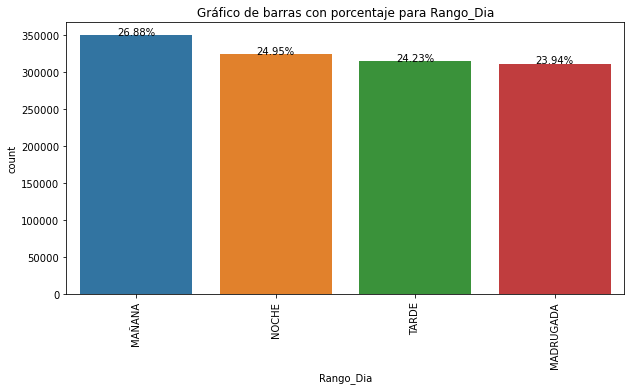


Tabla de recuentos y porcentajes para Rango_Dia
           Recuento  Porcentaje
Rango_Dia                      
MAÑANA       349955       26.88
NOCHE        324859       24.95
TARDE        315497       24.23
MADRUGADA    311750       23.94


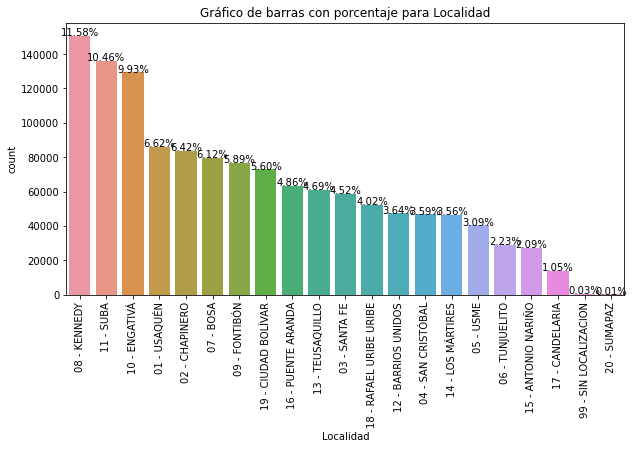


Tabla de recuentos y porcentajes para Localidad
                         Recuento  Porcentaje
Localidad                                    
08 - KENNEDY               150732       11.58
11 - SUBA                  136219       10.46
10 - ENGATIVÁ              129316        9.93
01 - USAQUÉN                86156        6.62
02 - CHAPINERO              83637        6.42
07 - BOSA                   79622        6.12
09 - FONTIBÓN               76645        5.89
19 - CIUDAD BOLÍVAR         72944        5.60
16 - PUENTE ARANDA          63340        4.86
13 - TEUSAQUILLO            61069        4.69
03 - SANTA FE               58822        4.52
18 - RAFAEL URIBE URIBE     52324        4.02
12 - BARRIOS UNIDOS         47373        3.64
04 - SAN CRISTÓBAL          46783        3.59
14 - LOS MÁRTIRES           46344        3.56
05 - USME                   40275        3.09
06 - TUNJUELITO             28985        2.23
15 - ANTONIO NARIÑO         27258        2.09
17 - CANDELARIA             137

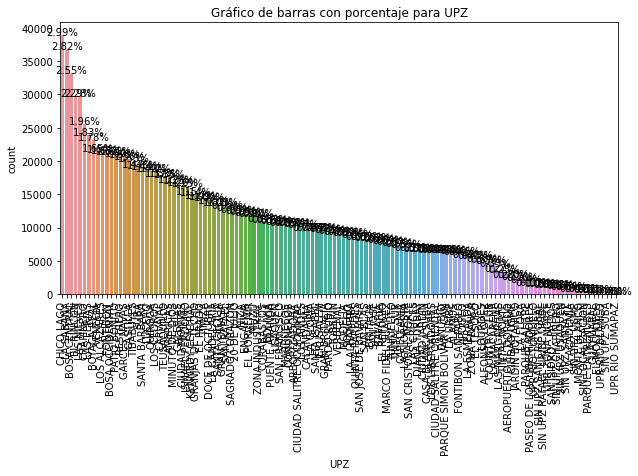


Tabla de recuentos y porcentajes para UPZ
                 Recuento  Porcentaje
UPZ                                  
CHICO LAGO          38903        2.99
LA SABANA           36758        2.82
BOSA CENTRAL        33201        2.55
EL RINCON           29760        2.29
LAS NIEVES          29732        2.28
...                   ...         ...
EL MOCHUELO           262        0.02
UPR RIO BLANCO         70        0.01
SIN UPZ SUBA           64        0.00
-                      40        0.00
UPR RIO SUMAPAZ        39        0.00

[125 rows x 2 columns]


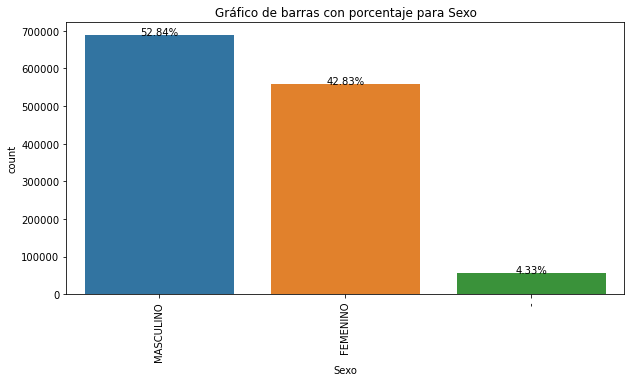


Tabla de recuentos y porcentajes para Sexo
           Recuento  Porcentaje
Sexo                           
MASCULINO    688055       52.84
FEMENINO     557666       42.83
-             56340        4.33


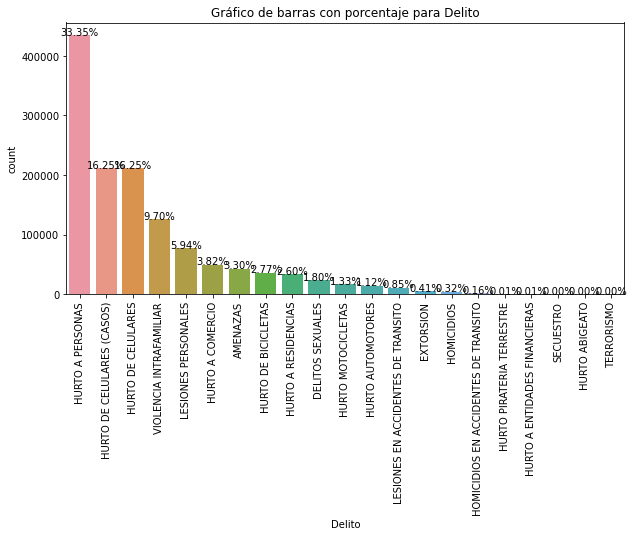


Tabla de recuentos y porcentajes para Delito
                                      Recuento  Porcentaje
Delito                                                    
HURTO A PERSONAS                        434283       33.35
HURTO DE CELULARES (CASOS)              211605       16.25
HURTO DE CELULARES                      211605       16.25
VIOLENCIA INTRAFAMILIAR                 126339        9.70
LESIONES PERSONALES                      77297        5.94
HURTO A COMERCIO                         49740        3.82
AMENAZAS                                 42955        3.30
HURTO DE BICICLETAS                      36084        2.77
HURTO A RESIDENCIAS                      33791        2.60
DELITOS SEXUALES                         23394        1.80
HURTO MOTOCICLETAS                       17317        1.33
HURTO AUTOMOTORES                        14551        1.12
LESIONES EN ACCIDENTES DE TRANSITO       11059        0.85
EXTORSION                                 5375        0.41
HOMICIDIOS

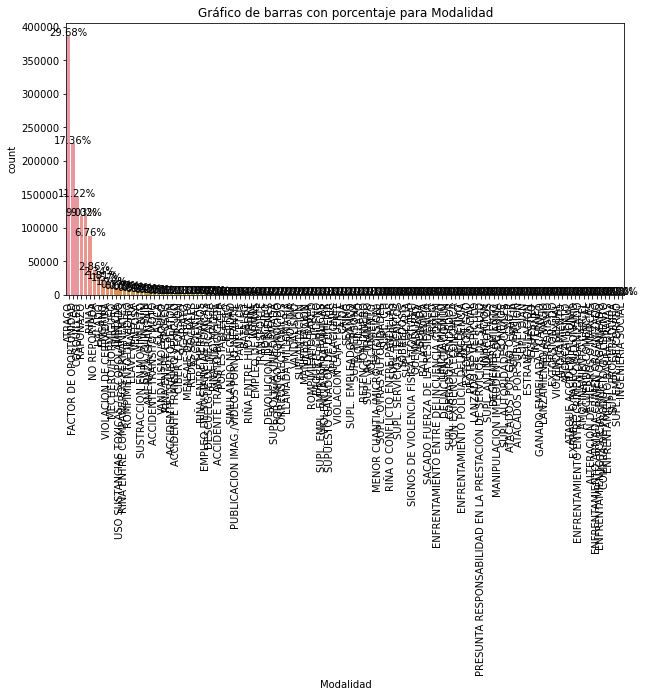


Tabla de recuentos y porcentajes para Modalidad
                               Recuento  Porcentaje
Modalidad                                          
ATRACO                           386469       29.68
FACTOR DE OPORTUNIDAD            226056       17.36
COSQUILLEO                       146135       11.22
RAPONAZO                         117578        9.03
-                                117454        9.02
...                                 ...         ...
COMPRA DE PRODUCTO O ELEMENTO         1        0.00
ENFRENTAMIENTO BARRA BRAVAS           1        0.00
SUPL. PROCURADURIA                    1        0.00
SUPL. EMPL. DE CORREO                 1        0.00
INGENIERIA SOCIAL                     1        0.00

[130 rows x 2 columns]


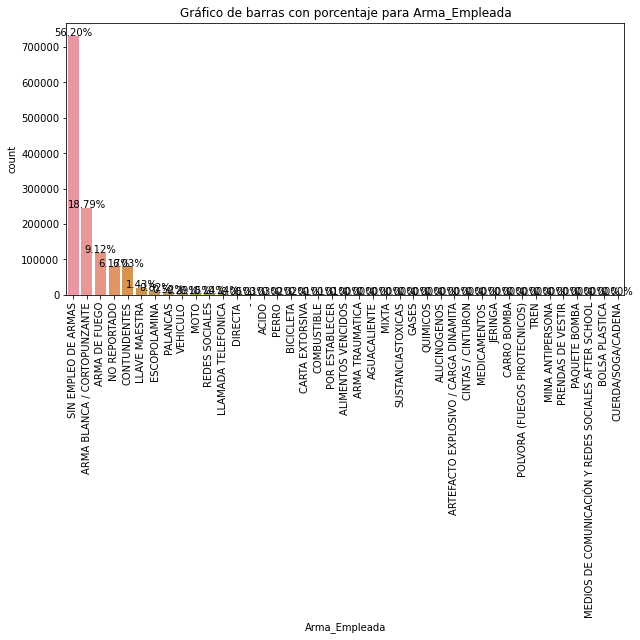


Tabla de recuentos y porcentajes para Arma_Empleada
                                                    Recuento  Porcentaje
Arma_Empleada                                                           
SIN EMPLEO DE ARMAS                                   731800       56.20
ARMA BLANCA / CORTOPUNZANTE                           244610       18.79
ARMA DE FUEGO                                         118793        9.12
NO REPORTADO                                           80365        6.17
CONTUNDENTES                                           78505        6.03
LLAVE MAESTRA                                          18566        1.43
ESCOPOLAMINA                                           10681        0.82
PALANCAS                                                6753        0.52
VEHICULO                                                3733        0.29
MOTO                                                    1990        0.15
REDES SOCIALES                                          1849        0.1

In [31]:
import pandas as pd

for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    total = len(dfDelitosNew[col])  # Calcular el total de registros en la columna
    ax = sns.countplot(data=dfDelitosNew, x=col, order=dfDelitosNew[col].value_counts().index)
    plt.xticks(rotation=90)
    
    # Añadir etiquetas de porcentaje a cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}%'.format(height / total * 100),
                ha="center")
    
    plt.title(f'Gráfico de barras con porcentaje para {col}')
    plt.show()
    
    # Crear una tabla con las cifras
    counts = dfDelitosNew[col].value_counts()
    percentages = (counts / total * 100).round(2)
    table = pd.concat([counts, percentages], axis=1)
    table.columns = ['Recuento', 'Porcentaje']
    table.index.name = col
    print("\nTabla de recuentos y porcentajes para", col)
    print(table)

Se imputan los valores '-' para reemplazarlos con un valor estimado

In [32]:
most_frequent = dfDelitosNew['Sexo'].value_counts().idxmax()
dfDelitosNew['Sexo'] = dfDelitosNew['Sexo'].replace('-', most_frequent)

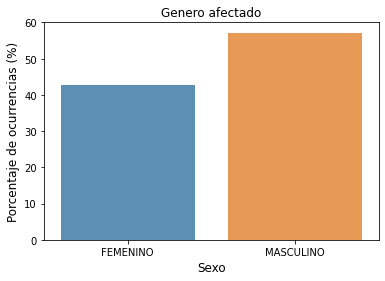

In [42]:
# Contamos la frecuencia de cada categoría en la columna 'Sexo'
counts = dfDelitosNew['Sexo'].value_counts()

# Calculamos los porcentajes
percentages = counts / dfDelitosNew['Sexo'].count() * 100

# Gráfico de barras utilizando seaborn
sns.barplot(x=percentages.index, y=percentages.values, alpha=0.8)

plt.title('Genero afectado')
plt.ylabel('Porcentaje de ocurrencias (%)', fontsize=12)
plt.xlabel('Sexo', fontsize=12)
plt.show()

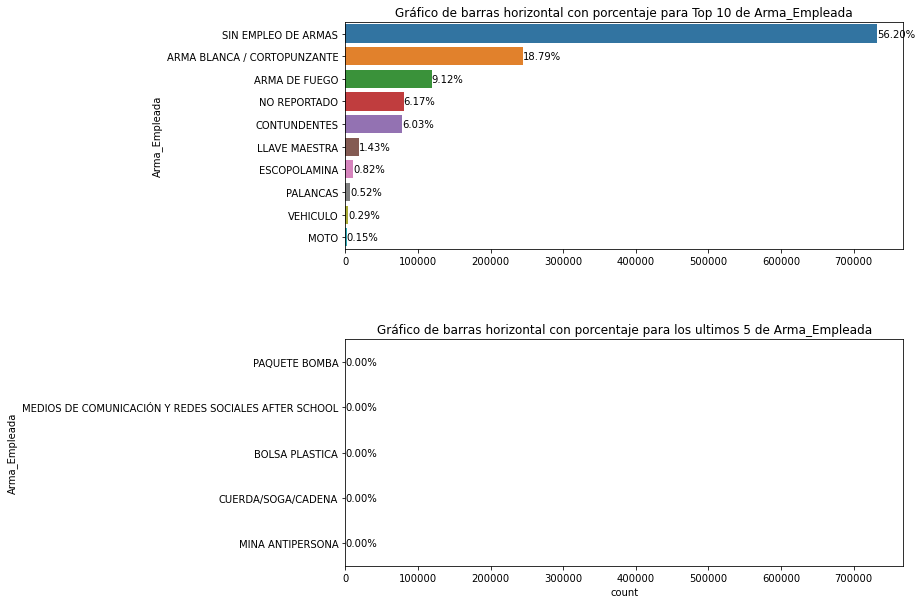

In [43]:
# Definir el número de categorías en cada top
top_mayor = 10
top_menor = 5

# Seleccionar el top de categorías con mayor frecuencia y el top de categorías con menor frecuencia
modalidad_mayor = dfDelitosNew['Arma_Empleada'].value_counts().nlargest(top_mayor).index
modalidad_menor = dfDelitosNew['Arma_Empleada'].value_counts().nsmallest(top_menor).index

# Crear DataFrames con solo las categorías seleccionadas
df_top_mayor = dfDelitosNew[dfDelitosNew['Arma_Empleada'].isin(modalidad_mayor)]
df_top_menor = dfDelitosNew[dfDelitosNew['Arma_Empleada'].isin(modalidad_menor)]

# Calcular el total de registros en la columna
total = len(dfDelitosNew['Arma_Empleada'])

# Función para agregar etiquetas de porcentaje a cada barra
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_width()
        ax.text(height + 3,
                p.get_y() + p.get_height() / 2.,
                '{:1.2f}%'.format(height / total * 100),
                va="center")

# Crear el gráfico de barras horizontal para el top de categorías con mayor frecuencia
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
sns.countplot(data=df_top_mayor, y='Arma_Empleada', order=modalidad_mayor, ax=ax1)
add_percentage_labels(ax1)
plt.title(f'Gráfico de barras horizontal con porcentaje para Top {top_mayor} de Arma_Empleada')
ax1.set_xlabel('')  # Eliminar la etiqueta del eje X para evitar redundancia

# Crear el gráfico de barras horizontal para el top de categorías con menor frecuencia
ax2 = plt.subplot(2, 1, 2, sharex=ax1)  # Compartir el eje X para mantener la misma escala
sns.countplot(data=df_top_menor, y='Arma_Empleada', order=modalidad_menor, ax=ax2)
add_percentage_labels(ax2)
plt.title(f'Gráfico de barras horizontal con porcentaje para los ultimos {top_menor} de Arma_Empleada')

# Ajustar el espacio entre los dos gráficos
plt.subplots_adjust(hspace=0.4)

plt.show()

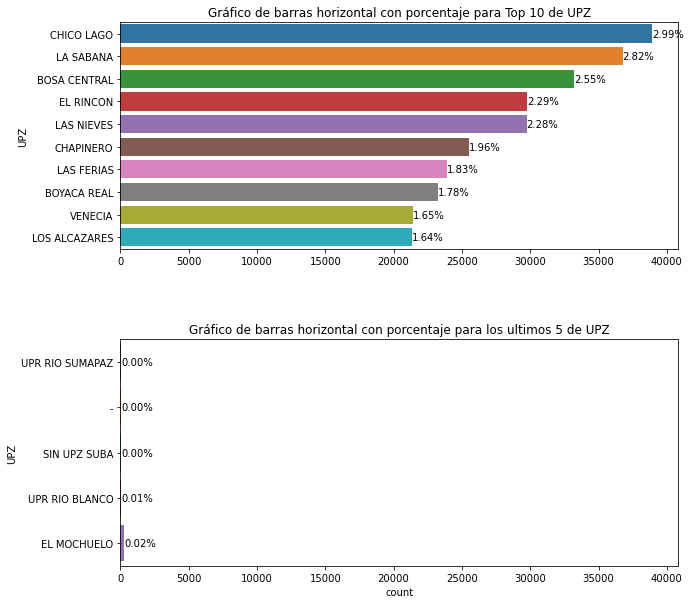

In [44]:
# Definir el número de categorías en cada top
top_mayor = 10
top_menor = 5

# Seleccionar el top de categorías con mayor frecuencia y el top de categorías con menor frecuencia
upz_mayor = dfDelitosNew['UPZ'].value_counts().nlargest(top_mayor).index
upz_menor = dfDelitosNew['UPZ'].value_counts().nsmallest(top_menor).index

# Crear DataFrames con solo las categorías seleccionadas
df_top_mayor = dfDelitosNew[dfDelitosNew['UPZ'].isin(upz_mayor)]
df_top_menor = dfDelitosNew[dfDelitosNew['UPZ'].isin(upz_menor)]

# Calcular el total de registros en la columna
total = len(dfDelitosNew['UPZ'])

# Función para agregar etiquetas de porcentaje a cada barra
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_width()
        ax.text(height + 3,
                p.get_y() + p.get_height() / 2.,
                '{:1.2f}%'.format(height / total * 100),
                va="center")

# Crear el gráfico de barras horizontal para el top de categorías con mayor frecuencia
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
sns.countplot(data=df_top_mayor, y='UPZ', order=upz_mayor, ax=ax1)
add_percentage_labels(ax1)
plt.title(f'Gráfico de barras horizontal con porcentaje para Top {top_mayor} de UPZ')
ax1.set_xlabel('')  # Eliminar la etiqueta del eje X para evitar redundancia

# Crear el gráfico de barras horizontal para el top de categorías con menor frecuencia
ax2 = plt.subplot(2, 1, 2, sharex=ax1)  # Compartir el eje X para mantener la misma escala
sns.countplot(data=df_top_menor, y='UPZ', order=upz_menor, ax=ax2)
add_percentage_labels(ax2)
plt.title(f'Gráfico de barras horizontal con porcentaje para los ultimos {top_menor} de UPZ')

# Ajustar el espacio entre los dos gráficos
plt.subplots_adjust(hspace=0.4)

plt.show()

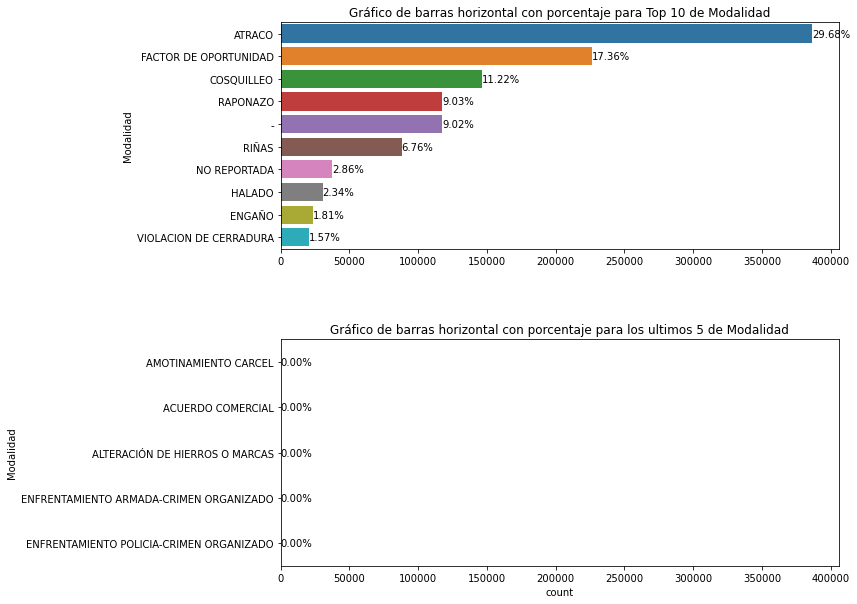

In [45]:
# Definir el número de categorías en cada top
top_mayor = 10
top_menor = 5

# Seleccionar el top de categorías con mayor frecuencia y el top de categorías con menor frecuencia
modalidad_mayor = dfDelitosNew['Modalidad'].value_counts().nlargest(top_mayor).index
modalidad_menor = dfDelitosNew['Modalidad'].value_counts().nsmallest(top_menor).index

# Crear DataFrames con solo las categorías seleccionadas
df_top_mayor = dfDelitosNew[dfDelitosNew['Modalidad'].isin(modalidad_mayor)]
df_top_menor = dfDelitosNew[dfDelitosNew['Modalidad'].isin(modalidad_menor)]

# Calcular el total de registros en la columna
total = len(dfDelitosNew['Modalidad'])

# Función para agregar etiquetas de porcentaje a cada barra
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_width()
        ax.text(height + 3,
                p.get_y() + p.get_height() / 2.,
                '{:1.2f}%'.format(height / total * 100),
                va="center")

# Crear el gráfico de barras horizontal para el top de categorías con mayor frecuencia
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
sns.countplot(data=df_top_mayor, y='Modalidad', order=modalidad_mayor, ax=ax1)
add_percentage_labels(ax1)
plt.title(f'Gráfico de barras horizontal con porcentaje para Top {top_mayor} de Modalidad')
ax1.set_xlabel('')  # Eliminar la etiqueta del eje X para evitar redundancia

# Crear el gráfico de barras horizontal para el top de categorías con menor frecuencia
ax2 = plt.subplot(2, 1, 2, sharex=ax1)  # Compartir el eje X para mantener la misma escala
sns.countplot(data=df_top_menor, y='Modalidad', order=modalidad_menor, ax=ax2)
add_percentage_labels(ax2)
plt.title(f'Gráfico de barras horizontal con porcentaje para los ultimos {top_menor} de Modalidad')

# Ajustar el espacio entre los dos gráficos
plt.subplots_adjust(hspace=0.4)

plt.show()

# Estadísticas descriptivas para variables numéricas

## Análisis Estadístico de Variables Numéricas:

In [46]:
# Desactivar notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
dfDelitosNew.describe()


Estadísticas descriptivas para variables numéricas:


,Anio,Mes,Dia,Numero_Hechos
count,1302061.00,1302061.00,1302061.00,1302061.00
mean,2020.63,6.50,15.66,1.05
std,1.22,3.55,8.82,0.26
min,2019.00,1.00,1.00,1.00
25%,2019.00,3.00,8.00,1.00
50%,2021.00,7.00,16.00,1.00
75%,2022.00,10.00,23.00,1.00
max,2023.00,12.00,31.00,19.00


## Visualización de datos (Distribución de Delitos por Año y Mes)

In [47]:
from tabulate import tabulate

# Crear una tabla pivote con la suma del número de hechos por año y mes
tabla = dfDelitosNew.pivot_table(values='Numero_Hechos', index='Anio', columns='Mes', aggfunc='sum')

# Reemplazar los números de los meses por sus abreviaturas
meses_abreviados = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
tabla.columns = meses_abreviados

# Mostrar la tabla con bordes utilizando la función tabulate
print(tabulate(tabla, headers='keys', tablefmt='pipe', showindex=True))

|   Anio |   Ene |   Feb |   Mar |   Abr |   May |   Jun |   Jul |   Ago |   Sep |   Oct |   Nov |   Dic |
|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2019 | 24383 | 27430 | 32334 | 27778 | 31390 | 26788 | 29076 | 29042 | 29547 | 30317 | 30074 | 32220 |
|   2020 | 31543 | 28708 | 20409 | 10249 | 18070 | 19654 | 21917 | 21889 | 23393 | 26298 | 25193 | 26624 |
|   2021 | 21526 | 25294 | 26839 | 21794 | 26317 | 26851 | 28706 | 28460 | 27818 | 29987 | 29581 | 27278 |
|   2022 | 25788 | 27448 | 33489 | 29156 | 29437 | 27056 | 27302 | 33313 | 39738 | 40898 | 34334 | 31615 |
|   2023 | 30256 | 16234 |   nan |   nan |   nan |   nan |   nan |   nan |   nan |   nan |   nan |   nan |


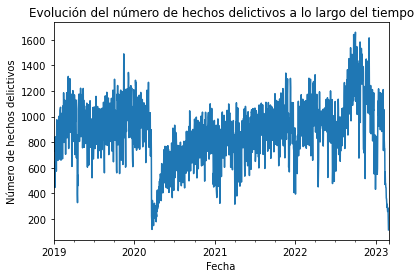

In [48]:
dfDelitosNew.groupby('Fecha')['Numero_Hechos'].sum().plot()
plt.title('Evolución del número de hechos delictivos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de hechos delictivos')
plt.show()

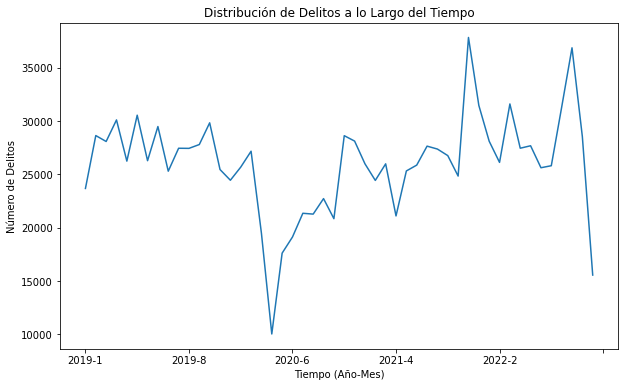

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una nueva columna que sea el año y el mes juntos
dfDelitosNew['AnioMes'] = dfDelitosNew['Anio'].astype(str) + '-' + dfDelitosNew['Mes'].astype(str)

# Agrupamos por la nueva columna y contamos los delitos
delitos_por_mes = dfDelitosNew.groupby('AnioMes').size()

# Crear un gráfico de línea
delitos_por_mes.plot(kind='line', figsize=(10,6))

plt.title('Distribución de Delitos a lo Largo del Tiempo')
plt.xlabel('Tiempo (Año-Mes)')
plt.ylabel('Número de Delitos')
plt.show()

## Análisis de Outliers basado en reglas de dominio:

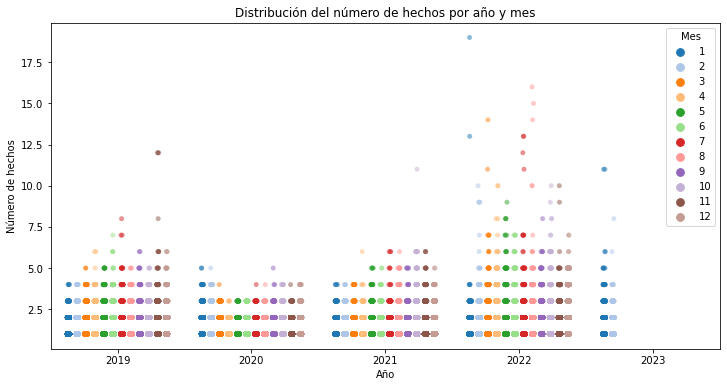

In [50]:
# Gráfico de caja de número de eventos por año y mes
plt.figure(figsize=(12, 6))

# Crear un mapa de colores personalizado utilizando el mapa de colores "tab20"
cmap = plt.get_cmap("tab20")

# Asignar colores a los meses utilizando el mapa de colores personalizado
colors = [cmap(i) for i in range(12)]

# Agregar puntos al gráfico utilizando stripplot() y los colores personalizados
sns.stripplot(x='Anio', y='Numero_Hechos', hue='Mes', data=dfDelitosNew, palette=colors, dodge=True, jitter=True, alpha=0.5)

# Configurar títulos y etiquetas
plt.title('Distribución del número de hechos por año y mes')
plt.xlabel('Año')
plt.ylabel('Número de hechos')
plt.legend(title='Mes', loc='upper right')

# Mostrar el gráfico
plt.show()

In [51]:
dfDelitosNew['Numero_Hechos'].describe()

count   1302061.00
mean          1.05
std           0.26
min           1.00
25%           1.00
50%           1.00
75%           1.00
max          19.00
Name: Numero_Hechos, dtype: float64

In [52]:
# Establecer el umbral
umbral = 10

# Crear una nueva columna "Es_Outlier" basada en la regla de dominio
dfDelitosNew['Es_Outlier'] = dfDelitosNew['Numero_Hechos'] > umbral

# Filtrar los outliers y hacer una copia de los datos
outliers = dfDelitosNew[dfDelitosNew['Es_Outlier']].copy()

# Calcular el z-score para la columna "Numero_Hechos"
outliers['Z_Score'] = stats.zscore(outliers['Numero_Hechos'])

# Ordenar los outliers de mayor a menor
outliers = outliers.sort_values(by='Numero_Hechos', ascending=False)

# Presentar los resultados en una tabla
tabla_outliers = outliers[['Anio', 'Mes', 'Dia', 'Numero_Hechos', 'Z_Score']]
tabla_outliers = tabla_outliers.reset_index(drop=True)  # Reiniciar los índices
tabla_formato = tabulate(tabla_outliers, headers='keys', tablefmt='fancy_grid')
print(tabla_formato)

# Eliminar los outliers del DataFrame original
dfDelitosNew = dfDelitosNew[dfDelitosNew['Numero_Hechos'] <= umbral]

# Eliminar las columnas creadas para el cálculo del outlier
dfDelitosNew.drop(['Es_Outlier'], axis=1, inplace=True)
outliers.drop(['Es_Outlier', 'Z_Score'], axis=1, inplace=True)


╒════╤════════╤═══════╤═══════╤═════════════════╤════════════╕
│    │   Anio │   Mes │   Dia │   Numero_Hechos │    Z_Score │
╞════╪════════╪═══════╪═══════╪═════════════════╪════════════╡
│  0 │   2022 │     1 │    30 │              19 │  2.88571   │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  1 │   2022 │     8 │    13 │              16 │  1.45686   │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  2 │   2022 │     8 │    15 │              15 │  0.980581  │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  3 │   2022 │     8 │     7 │              14 │  0.504299  │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  4 │   2022 │     3 │    29 │              14 │  0.504299  │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  5 │   2022 │     7 │     5 │              13 │  0.0280166 │
├────┼────────┼───────┼───────┼─────────────────┼────────────┤
│  6 │   2022 │     1 │    24 │              13 │  0.02

In [55]:
dfDelitosNew['Numero_Hechos'].describe()

count   1302044.00
mean          1.05
std           0.26
min           1.00
25%           1.00
50%           1.00
75%           1.00
max          10.00
Name: Numero_Hechos, dtype: float64

## Análisis de Correlación entre Delito, Localidad y Número de Hechos

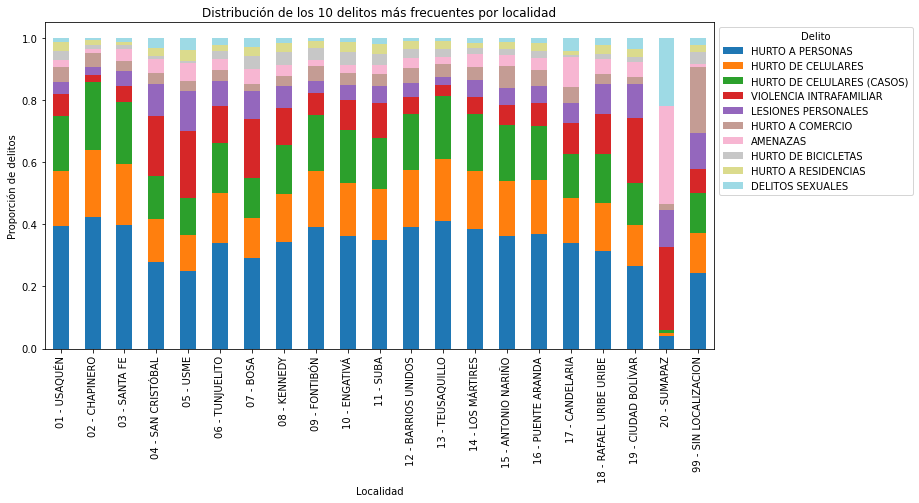

In [56]:
# Crear una tabla pivote con la suma del número de hechos por localidad y delito
tabla_pivote = dfDelitosNew.pivot_table(values='Numero_Hechos', index='Localidad', columns='Delito', aggfunc='sum', fill_value=0)

# Obtener la suma de hechos por delito
suma_delitos = tabla_pivote.sum()

# Filtrar los top 10 delitos más frecuentes
top_10_delitos = suma_delitos.nlargest(10)

# Filtrar la tabla pivote para incluir solo los top 10 delitos
tabla_pivote_top10 = tabla_pivote[top_10_delitos.index]

# Normalizar las filas para que sumen 1
tabla_pivote_norm = tabla_pivote_top10.div(tabla_pivote_top10.sum(axis=1), axis=0)

# Crear un gráfico de barras apiladas
ax = tabla_pivote_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Configurar títulos y etiquetas
plt.title('Distribución de los 10 delitos más frecuentes por localidad')
plt.xlabel('Localidad')
plt.ylabel('Proporción de delitos')
plt.xticks(rotation=90)
plt.legend(title='Delito', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

In [57]:
# Crear una tabla pivote con la suma del número de hechos por localidad y delito
tabla_pivote = dfDelitosNew.pivot_table(values='Numero_Hechos', index='Localidad', columns='Delito', aggfunc='sum', fill_value=0)

# Obtener la suma de hechos por delito
suma_delitos = tabla_pivote.sum()

# Filtrar los top 10 delitos más frecuentes
top_10_delitos = suma_delitos.nlargest(10)

# Filtrar la tabla pivote para incluir solo los top 10 delitos
tabla_pivote_top10 = tabla_pivote[top_10_delitos.index]

# Normalizar las filas para que sumen 1 y convertir a porcentajes
tabla_pivote_norm = tabla_pivote_top10.div(tabla_pivote_top10.sum(axis=1), axis=0) * 100

# Convertir los valores de la tabla en formato de porcentaje
tabla_pivote_norm = tabla_pivote_norm.applymap('{:.2f}%'.format)

# Convertir la tabla en un formato tabular
tabla_formato = tabulate(tabla_pivote_norm, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(tabla_formato)

╒═════════════════════════╤════════════════════╤══════════════════════╤══════════════════════════════╤═══════════════════════════╤═══════════════════════╤════════════════════╤════════════╤═══════════════════════╤═══════════════════════╤════════════════════╕
│ Localidad               │ HURTO A PERSONAS   │ HURTO DE CELULARES   │ HURTO DE CELULARES (CASOS)   │ VIOLENCIA INTRAFAMILIAR   │ LESIONES PERSONALES   │ HURTO A COMERCIO   │ AMENAZAS   │ HURTO DE BICICLETAS   │ HURTO A RESIDENCIAS   │ DELITOS SEXUALES   │
╞═════════════════════════╪════════════════════╪══════════════════════╪══════════════════════════════╪═══════════════════════════╪═══════════════════════╪════════════════════╪════════════╪═══════════════════════╪═══════════════════════╪════════════════════╡
│ 01 - USAQUÉN            │ 39.39%             │ 17.78%               │ 17.78%                       │ 6.93%                     │ 3.97%                 │ 4.89%              │ 2.31%      │ 2.64%                 │ 3.03%        

In [58]:
# Filtrar los delitos específicos
delitos_especificos = ['HURTO DE CELULARES', 'HURTO DE CELULARES (CASOS)']
df_filtrado = dfDelitosNew.loc[dfDelitosNew['Delito'].isin(delitos_especificos)]

# Realizar el conteo de delitos
conteo_delitos = df_filtrado['Delito'].value_counts().reset_index()
conteo_delitos.columns = ['Delito', 'RECUENTO']

# Eliminar las filas con recuento igual a cero
conteo_delitos = conteo_delitos[conteo_delitos['RECUENTO'] > 0]

# Convertir el DataFrame en una tabla
tabla_resultado = tabulate(conteo_delitos, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(tabla_resultado)

╒════╤════════════════════════════╤════════════╕
│    │ Delito                     │   RECUENTO │
╞════╪════════════════════════════╪════════════╡
│  0 │ HURTO DE CELULARES (CASOS) │     211604 │
├────┼────────────────────────────┼────────────┤
│  1 │ HURTO DE CELULARES         │     211604 │
╘════╧════════════════════════════╧════════════╛


Eliminacion categoria HURTO DE CELULARES (CASOS)

In [59]:
dfDelitosNew = dfDelitosNew[dfDelitosNew['Delito'] != 'HURTO DE CELULARES (CASOS)']

In [60]:
# Filtrar los delitos específicos
delitos_especificos = ['HURTO DE CELULARES', 'HURTO DE CELULARES (CASOS)']
df_filtrado = dfDelitosNew.loc[dfDelitosNew['Delito'].isin(delitos_especificos)]

# Realizar el conteo de delitos
conteo_delitos = df_filtrado['Delito'].value_counts().reset_index()
conteo_delitos.columns = ['Delito', 'RECUENTO']

# Eliminar las filas con recuento igual a cero
conteo_delitos = conteo_delitos[conteo_delitos['RECUENTO'] > 0]

# Convertir el DataFrame en una tabla
tabla_resultado = tabulate(conteo_delitos, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(tabla_resultado)

╒════╤════════════════════╤════════════╕
│    │ Delito             │   RECUENTO │
╞════╪════════════════════╪════════════╡
│  0 │ HURTO DE CELULARES │     211604 │
╘════╧════════════════════╧════════════╛


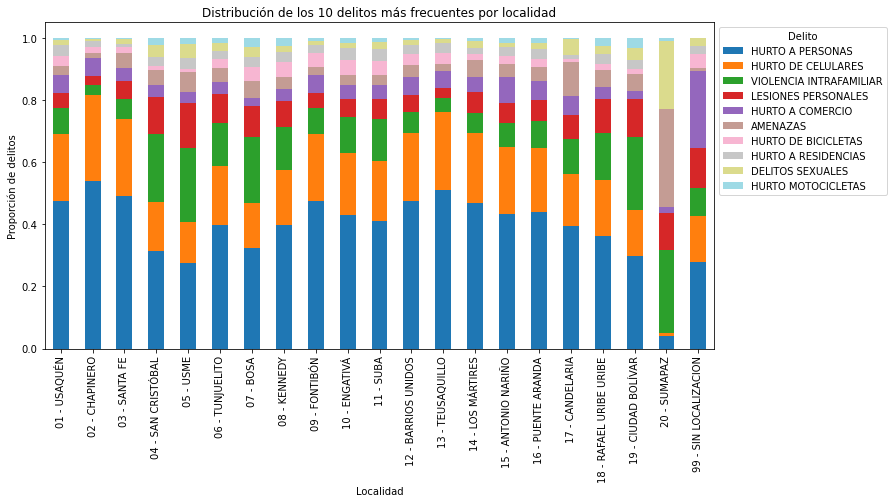

In [61]:
# Crear una tabla pivote con la suma del número de hechos por localidad y delito
tabla_pivote = dfDelitosNew.pivot_table(values='Numero_Hechos', index='Localidad', columns='Delito', aggfunc='sum', fill_value=0)

# Obtener la suma de hechos por delito
suma_delitos = tabla_pivote.sum()

# Filtrar los top 10 delitos más frecuentes
top_10_delitos = suma_delitos.nlargest(10)

# Filtrar la tabla pivote para incluir solo los top 10 delitos
tabla_pivote_top10 = tabla_pivote[top_10_delitos.index]

# Normalizar las filas para que sumen 1
tabla_pivote_norm = tabla_pivote_top10.div(tabla_pivote_top10.sum(axis=1), axis=0)

# Crear un gráfico de barras apiladas
ax = tabla_pivote_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Configurar títulos y etiquetas
plt.title('Distribución de los 10 delitos más frecuentes por localidad')
plt.xlabel('Localidad')
plt.ylabel('Proporción de delitos')
plt.xticks(rotation=90)
plt.legend(title='Delito', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

## Mapa de Calor

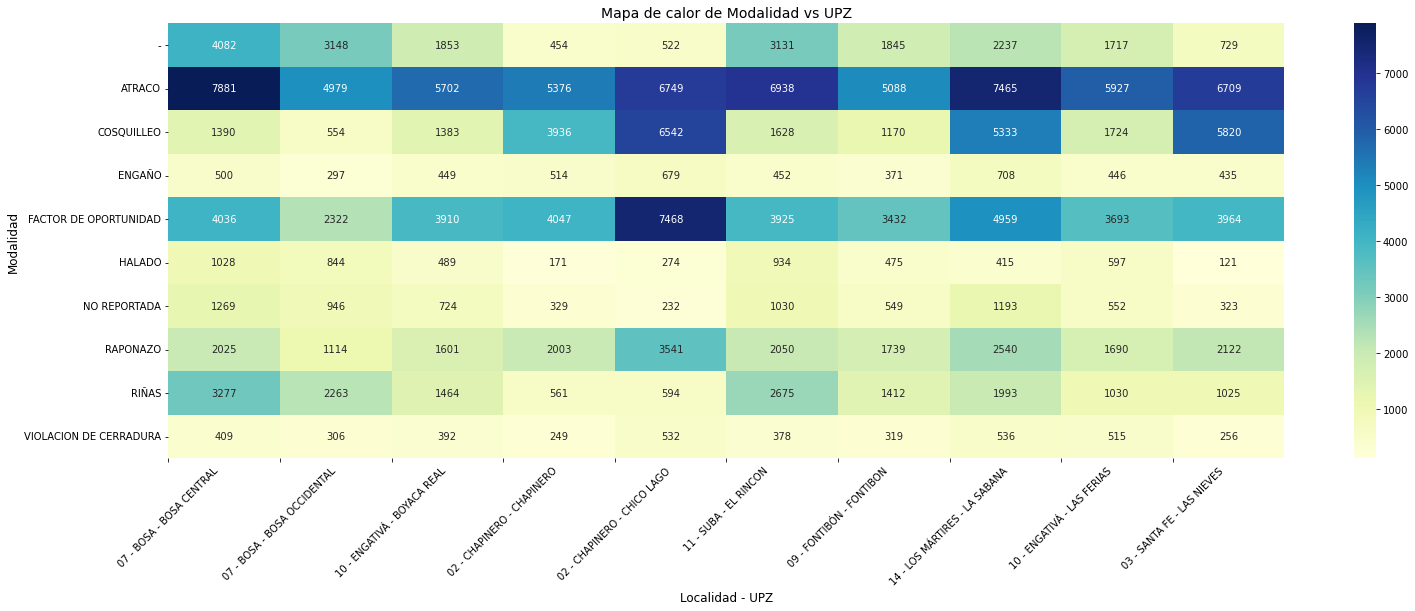

In [62]:
# Filtrar las modalidades más frecuentes
top_5_delitos = dfDelitosNew['Modalidad'].value_counts().nlargest(10).index
df_filtrado = dfDelitosNew[dfDelitosNew['Modalidad'].isin(top_5_delitos)]

# Filtrar las 10 UPZ con mayor densidad
top_10_UPZ = df_filtrado['UPZ'].value_counts().nlargest(10).index
df_filtrado = df_filtrado[df_filtrado['UPZ'].isin(top_10_UPZ)]

# Crear una tabla de contingencia
crosstab = pd.crosstab(df_filtrado['Modalidad'], df_filtrado['UPZ'])

# Crear un mapa de calor a partir de la tabla de contingencia
plt.figure(figsize=(25, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10})

plt.title('Mapa de calor de Modalidad vs UPZ', fontsize=14)
plt.xlabel('Localidad - UPZ', fontsize=12)
plt.ylabel('Modalidad', fontsize=12)

# Obtener las etiquetas de las UPZ con su respectiva localidad
upz_localidad_labels = [f'{df_filtrado[df_filtrado["UPZ"]==upz]["Localidad"].iloc[0]} - {upz}' for upz in crosstab.columns]
plt.xticks(ticks=range(len(upz_localidad_labels)), labels=upz_localidad_labels, rotation=45)

plt.show()

In [63]:
# Obtener los datos del mapa de calor
datos_mapa_calor = crosstab.reset_index()

# Agregar la etiqueta "Localidad - UPZ" a los encabezados de las columnas
datos_mapa_calor.columns = ['Modalidad'] + [f'Localidad - UPZ: {upz}' for upz in datos_mapa_calor.columns[1:]]

datos_mapa_calor


,Modalidad,Localidad - UPZ: BOSA CENTRAL,Localidad - UPZ: BOSA OCCIDENTAL,Localidad - UPZ: BOYACA REAL,Localidad - UPZ: CHAPINERO,Localidad - UPZ: CHICO LAGO,Localidad - UPZ: EL RINCON,Localidad - UPZ: FONTIBON,Localidad - UPZ: LA SABANA,Localidad - UPZ: LAS FERIAS,Localidad - UPZ: LAS NIEVES
0,-,4082,3148,1853,454,522,3131,1845,2237,1717,729
1,ATRACO,7881,4979,5702,5376,6749,6938,5088,7465,5927,6709
2,COSQUILLEO,1390,554,1383,3936,6542,1628,1170,5333,1724,5820
3,ENGAÑO,500,297,449,514,679,452,371,708,446,435
4,FACTOR DE OPORTUNIDAD,4036,2322,3910,4047,7468,3925,3432,4959,3693,3964
5,HALADO,1028,844,489,171,274,934,475,415,597,121
6,NO REPORTADA,1269,946,724,329,232,1030,549,1193,552,323
7,RAPONAZO,2025,1114,1601,2003,3541,2050,1739,2540,1690,2122
8,RIÑAS,3277,2263,1464,561,594,2675,1412,1993,1030,1025
9,VIOLACION DE CERRADURA,409,306,392,249,532,378,319,536,515,256


Reemplaza '-' con 'NO REPORTADA' en la columna 'Modalidad'

In [64]:
dfDelitosNew['Modalidad'] = dfDelitosNew['Modalidad'].replace('-', 'NO REPORTADA')


C:\Users\ANDRES~1\AppData\Local\Temp/ipykernel_25156/3701728641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDelitosNew['Modalidad'] = dfDelitosNew['Modalidad'].replace('-', 'NO REPORTADA')


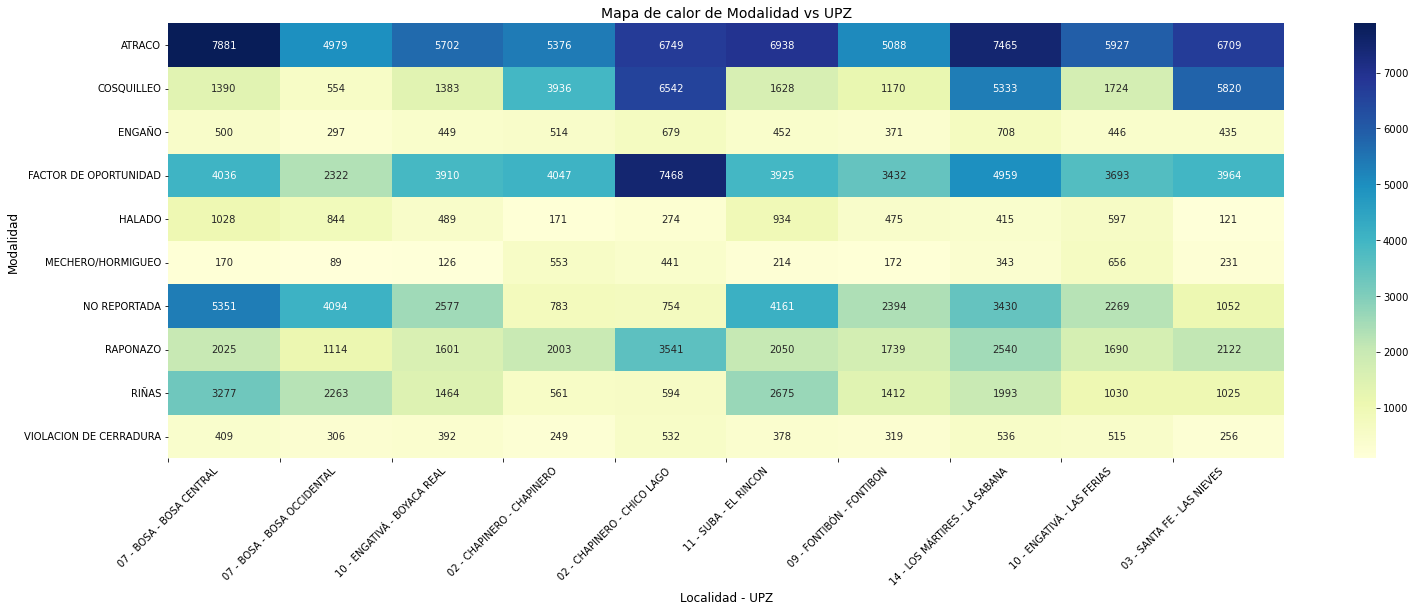

In [65]:
# Filtrar las modalidades más frecuentes
top_5_delitos = dfDelitosNew['Modalidad'].value_counts().nlargest(10).index
df_filtrado = dfDelitosNew[dfDelitosNew['Modalidad'].isin(top_5_delitos)]

# Filtrar las 10 UPZ con mayor densidad
top_10_UPZ = df_filtrado['UPZ'].value_counts().nlargest(10).index
df_filtrado = df_filtrado[df_filtrado['UPZ'].isin(top_10_UPZ)]

# Crear una tabla de contingencia
crosstab = pd.crosstab(df_filtrado['Modalidad'], df_filtrado['UPZ'])

# Crear un mapa de calor a partir de la tabla de contingencia
plt.figure(figsize=(25, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10})

plt.title('Mapa de calor de Modalidad vs UPZ', fontsize=14)
plt.xlabel('Localidad - UPZ', fontsize=12)
plt.ylabel('Modalidad', fontsize=12)

# Obtener las etiquetas de las UPZ con su respectiva localidad
upz_localidad_labels = [f'{df_filtrado[df_filtrado["UPZ"]==upz]["Localidad"].iloc[0]} - {upz}' for upz in crosstab.columns]
plt.xticks(ticks=range(len(upz_localidad_labels)), labels=upz_localidad_labels, rotation=45)

plt.show()

# Guardando los datos preprocesados

In [66]:
# Si la colección "DelitosPrepro" existe, bórrala
if "DelitosPrepro" in dbSiedco.list_collection_names():
    dbSiedco["DelitosPrepro"].drop()

# Seleccionar la colección "DelitosPrepro"
collection = dbSiedco["DelitosPrepro"]

# Convertir el DataFrame a un formato que MongoDB pueda entender
data = dfDelitosNew.to_dict("records")

# Insertar los datos en la colección
collection.insert_many(data)